In [2]:
"""
BACKUP
    C = {
        0:{
            'center': [1,1],
            'points': []
            },     
        1:{
            'center': [-1,1],
            'points': []
            }
    }
"""

"\nBACKUP\n    C = {\n        0:{\n            'center': [1,1],\n            'points': []\n            },     \n        1:{\n            'center': [-1,1],\n            'points': []\n            }\n    }\n"

In [180]:
import numpy as np
import pprint
from numpy import array as arr
from matplotlib import pyplot as plt
%matplotlib inline

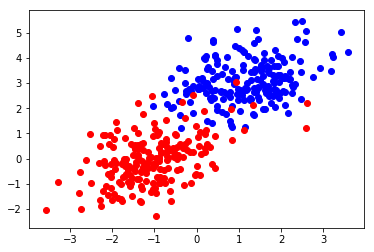

In [181]:
mean_01 = np.array([1.0, 3.0])
mean_02 = np.array([-1.0, 0.0])

cov_01 = np.array([[0.8, 0.3], [0.3, 0.9]])
cov_02 = np.array([[0.9, 0.4], [0.4, 0.8]])

d1 = np.random.multivariate_normal(mean_01, cov_01, 200)
d2 = np.random.multivariate_normal(mean_02, cov_02, 200)

plt.figure(0)
plt.scatter(d1[:,0], d1[:,1], color = 'blue')
plt.scatter(d2[:,0], d2[:,1], color = 'red')

In [182]:
xt = np.zeros((d1.shape[0]+d2.shape[0],d1.shape[1]))
xt[:d1.shape[0]] = d1[:]
xt[d2.shape[0]:] = d2[:]

inf = float('inf')

In [183]:
def cost(x,y):
    return np.sqrt(((x-y)**2).sum())

cost(arr([1,1]), arr([2,2]))

1.4142135623730951

In [184]:
def createDict(k, xt=None, centers=None):
    #If we're already given a numpy array of centers, create a dictionary of those centers 
    if type(centers) != type(None):
        C = dict()
        for kx in range(k):
            cluster = {
                        'center': centers[kx],
                        'points': []
                      } 
            C[kx] = cluster
        return C
    
    
    #Else create a dictionary within the range of max and min of xt
    C = dict()
    minv, maxv = xt.min(), xt.max()
    centers = np.random.uniform(low = minv, high = maxv, size = (k,xt.shape[1]))
    for kx in range(k):
        cluster = {
                    'center':centers[kx,:],
                    'points':[]
                  } 
        C[kx] = cluster
    return C

print xt.shape
print createDict(k,xt)
#createDict(k, centers=arr([[1,2],[3,4]]))

(400, 2)
{0: {'points': [], 'center': array([ 4.58229527,  0.86877218])}, 1: {'points': [], 'center': array([ 1.99270069, -0.25684094])}}


In [185]:
def clusterize(k, xt, C):
    #Takes all the points of the cluster and assign them to their respective centers, then return a dictionary with points
    for point in xt:
        kv,kc = inf,-1
        for kx in range(k):
            if cost(point, C[kx]['center']) < kv:
                kv = cost(point, C[kx]['center'])
                kc = kx
        C[kc]['points'].append(point)
    return C

B = clusterize(2,xt,createDict(2,xt));

In [188]:
def updateCenters(k,xt,C):
    means = []
    for kx in range(k):
        if len(C[kx]['points']) == 0:
            C.pop(kx) 
            k -= 1
        else:
            means.append(np.mean(C[kx]['points'], axis=0))
    C = createDict(k,arr(means))
    return C,k

plt.figure(0)
for kx in range(k):
    print B[kx]['center']
    
B,k = updateCenters(k,xt,B)
for kx in range(k):
    print B[kx]['center']

[ 0.87900428 -1.13153258]
[ 1.43069559 -0.53704691]


ValueError: zero-size array to reduction operation minimum which has no identity

In [187]:
colours = ['red','blue']

def KMeans(k, xt, C=None, iter=100, plot=True, delay = False):
    if C == None:
        C = createDict(k,xt)
        
    if plot == True and delay == True:
        plt.figure(1)
        for kx in range(k):
            plt.scatter(C[kx]['center'][0],C[kx]['center'][0])
        
    for it in range(1,iter):
        C = clusterize(k,xt,C)
        C,k = updateCenters(k,xt,C)
    C = clusterize(k,xt,C)
    print k
    for kx in range(k):
        plt.scatter(C[kx]['center'][0], C[kx]['center'][0], color = 'black')
        plt.figure(kx+1)
        #plt.scatter(arr(C[0]['points'])[:,0], arr(C[kx]['points'])[:,1], color = colours[kx])
    return C      

1


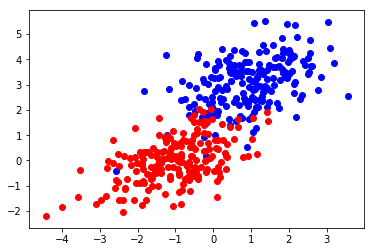

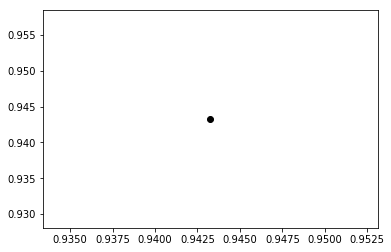

In [177]:
plt.figure(0)
plt.scatter(d1[:,0], d1[:,1], color = 'blue')
plt.scatter(d2[:,0], d2[:,1], color = 'red')

plt.figure(1)
#plt.scatter(xt[:,0], xt[:,1], color = 'black')

k=2
centers = [[2.0,2.0],[-1.0,0.0]]
Cx = createDict(k, centers=arr(centers)) 
C = KMeans(k,xt,Cx)

In [178]:
for c in range(k):
    print C[c]['center']

[ 0.94325373  1.49034696]


KeyError: 1